## Cases distribution

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
cases_citations = pd.read_csv('../inputdata/all_cases_citations.csv')

In [4]:
case_cites = cases_citations\
    .groupby('source')\
    .count()\
    .sort_values('target', ascending=False)\
    .reset_index()\
    .rename(columns = {'source':'case','target':'links'})

In [5]:
case_cites.describe()

,links
count,10264.000000
mean,4.265394
std,4.268959
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,55.000000


In [23]:
case_cites.quantile(.985, axis =0)

links    19.0
Name: 0.985, dtype: float64

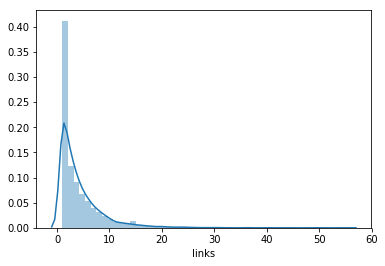

In [6]:
sns.distplot(case_cites['links'])

In [12]:
case_cites['percentile'] = case_cites.rank(pct=True)['links']

In [21]:
case_cites_95pct = case_cites[case_cites['percentile'] < .95]
case_cites_95pct.describe()

,links,percentile
count,9746.000000,9746.000000
mean,3.546378,0.474815
std,2.688889,0.269471
min,1.000000,0.134012
25%,1.000000,0.134012
50%,3.000000,0.511691
75%,5.000000,0.712344
max,12.000000,0.944320


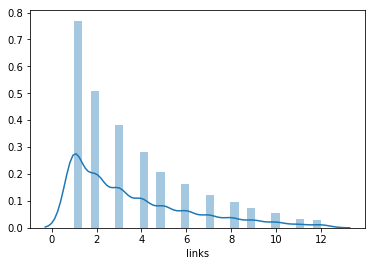

In [20]:
sns.distplot(case_cites_95pct['links'])

In [17]:
case_is_cited = cases_citations\
    .groupby('target')\
    .count()\
    .sort_values('source', ascending=False)\
    .reset_index()\
    .rename(columns = {'target':'case','source':'links'})

In [18]:
#case_is_cited

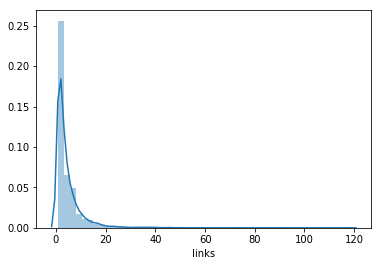

In [19]:
sns.distplot(case_is_cited['links'])

In [20]:
case_is_cited.describe()

,links
count,9663.000000
mean,4.530684
std,5.719543
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,118.000000


In [22]:
case_is_cited.quantile(.98, axis =0)

links    21.0
Name: 0.98, dtype: float64

#### One-Sample Kolmogorov-Smirnov Test for comparing with theoretical distribuition

In [7]:
cdfs = [
    "norm",            #Normal (Gaussian)
    "alpha",           #Alpha
    "anglit",          #Anglit
    "arcsine",         #Arcsine
    "beta",            #Beta
    "betaprime",       #Beta Prime
    "bradford",        #Bradford
    "burr",            #Burr
    "cauchy",          #Cauchy
    "chi",             #Chi
    "chi2",            #Chi-squared
    "cosine",          #Cosine
    "dgamma",          #Double Gamma
    "dweibull",        #Double Weibull
    "erlang",          #Erlang
    "expon",           #Exponential
    "exponweib",       #Exponentiated Weibull
    "exponpow",        #Exponential Power
    "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
    "foldcauchy",      #Folded Cauchy
    "f",               #F (Snecdor F)
    "fisk",            #Fisk
    "foldnorm",        #Folded Normal
    "frechet_r",       #Frechet Right Sided, Extreme Value Type II
    "frechet_l",       #Frechet Left Sided, Weibull_max
    "gamma",           #Gamma
    "gausshyper",      #Gauss Hypergeometric
    "genexpon",        #Generalized Exponential
    "genextreme",      #Generalized Extreme Value
    "gengamma",        #Generalized gamma
    "genlogistic",     #Generalized Logistic
    "genpareto",       #Generalized Pareto
    "genhalflogistic", #Generalized Half Logistic
    "gilbrat",         #Gilbrat
    "gompertz",        #Gompertz (Truncated Gumbel)
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "halfcauchy",      #Half Cauchy
    "halflogistic",    #Half Logistic
    "halfnorm",        #Half Normal
    "hypsecant",       #Hyperbolic Secant
    "invgamma",        #Inverse Gamma
#    "invnorm",         #Inverse Normal
    "invweibull",      #Inverse Weibull
    "johnsonsb",       #Johnson SB
    "johnsonsu",       #Johnson SU
    "laplace",         #Laplace
    "logistic",        #Logistic
    "loggamma",        #Log-Gamma
    "loglaplace",      #Log-Laplace (Log Double Exponential)
    "lognorm",         #Log-Normal
    "lomax",           #Lomax (Pareto of the second kind)
    "maxwell",         #Maxwell
    "mielke",          #Mielke's Beta-Kappa
    "nakagami",        #Nakagami
    "ncx2",            #Non-central chi-squared
#    "ncf",             #Non-central F
    "nct",             #Non-central Student's T
    "pareto",          #Pareto
    "powerlaw",        #Power-function
    "powerlognorm",    #Power log normal
    "powernorm",       #Power normal
    "rdist",           #R distribution
    "reciprocal",      #Reciprocal
    "rayleigh",        #Rayleigh
    "rice",            #Rice
    "recipinvgauss",   #Reciprocal Inverse Gaussian
    "semicircular",    #Semicircular
    "t",               #Student's T
    "triang",          #Triangular
    "truncexpon",      #Truncated Exponential
    "truncnorm",       #Truncated Normal
    "tukeylambda",     #Tukey-Lambda
    "uniform",         #Uniform
    "vonmises",        #Von-Mises (Circular)
    "wald",            #Wald
    "weibull_min",     #Minimum Weibull (see Frechet)
    "weibull_max",     #Maximum Weibull (see Frechet)
    "wrapcauchy",      #Wrapped Cauchy
    "ksone",           #Kolmogorov-Smirnov one-sided (no stats)
    "kstwobign"]       #Kolmogorov-Smirnov two-sided test for Large N

In [8]:
vector = case_is_cited.links.values
np.random.seed(9876)
results = []
for cdf in cdfs:
    #fit our data set against every probability distribution
    parameters = eval("scipy.stats."+cdf+".fit(vector)")
    #Applying the Kolmogorov-Smirnof one sided test
    D, p = scipy.stats.kstest(vector, cdf, args=parameters)
    if D < 1:
        results.append((cdf.ljust(16),p,D))

In [9]:
distribution_tests = pd.DataFrame(results)\
    .dropna()\
    .rename(columns = {0:'dist',1:'p-value',2:'D-statistic'})\
    .sort_values('D-statistic', ascending=False)

In [10]:
distribution_tests.head(10)

,dist,p-value,D-statistic
24,frechet_l,0.0,0.857780
73,weibull_max,0.0,0.857780
74,ksone,0.0,0.841760
70,uniform,0.0,0.841760
3,arcsine,0.0,0.737694
68,truncnorm,0.0,0.704440
60,reciprocal,0.0,0.704440
41,invgamma,0.0,0.704428
20,f,0.0,0.704416
31,genpareto,0.0,0.704409


In [11]:
#equivalent
#np.percentile(case_is_cited['links'], 99)
#case_is_cited.quantile(.99)